# 📘 Employee Attrition - Exploratory Data Analysis (EDA)

## 📄 Description  
This notebook performs an **Exploratory Data Analysis (EDA)** to understand the key factors influencing employee attrition.  
It includes **data visualization, feature distributions, and correlation analysis** to gain insights from the dataset.

## 👨‍💻 Author  
**Kfir Tayar** 

© Copyright 2025, Kfir Tayar. All rights reserved.  

## 🔹 Notebook Overview  
- Load and inspect the dataset  
- Perform basic summary statistics  
- Check for missing values  
- Analyze the distribution of key features  
- Visualize correlations between features  


In [76]:
# Import Libraries & Modules
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Add the path to the utils directory
sys.path.append(os.path.abspath('../utils'))

#Load Autoviz
from autoviz import AutoViz_Class
%matplotlib inline
AV = AutoViz_Class()

from eda_utils import data_protocol, display_png_plots

### Load Data Set

In [37]:
processed_df = pd.read_pickle("../Data/processed_employee_data_20250305.pkl")

In [39]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Gender                    74498 non-null  category
 1   Years at Company          74498 non-null  int64   
 2   Job Role                  74498 non-null  category
 3   Monthly Income            74498 non-null  int64   
 4   Work-Life Balance         74498 non-null  category
 5   Job Satisfaction          74498 non-null  category
 6   Performance Rating        74498 non-null  category
 7   Number of Promotions      74498 non-null  int64   
 8   Overtime                  74498 non-null  category
 9   Distance from Home        74498 non-null  int64   
 10  Education Level           74498 non-null  category
 11  Marital Status            74498 non-null  category
 12  Number of Dependents      74498 non-null  int64   
 13  Job Level                 74498 non-null  cate

### Data Protocol

In [7]:
# Create data protocol xlsx files
data_protocol(processed_df, folder='data', df_name='Employee_Attrition')

Creating Employee_Attrition_datatype
Employee_Attrition_Max
Employee_Attrition_Min
Employee_Attrition_Missing_Values
and Employee_Attrition_Unique files...

Data Protocol process is done!
Saved path: data/data_protocol


### AutoVis report

In [9]:
saving_plots_path = f"../data/autovis_plots/"
os.makedirs(saving_plots_path, exist_ok=True)

dft = AV.AutoViz(
    "",
    sep=",",
    depVar="Attrition",
    dfte=processed_df,
    header=0,
    verbose=2,
    lowess=False,
    chart_format="png",
    max_rows_analyzed=500,
    max_cols_analyzed=22,
    save_plot_dir=saving_plots_path
)

    Since nrows is smaller than dataset, loading random sample of 500 rows into pandas...
Shape of your Data Set loaded: (500, 23)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
  Printing up to 30 columns (max) in each category:
    Numeric Columns : []
    Integer-Categorical Columns: ['Years at Company', 'Monthly Income', 'Number of Promotions', 'Distance from Home', 'Number of Dependents']
    String-Categorical Columns: []
    Factor-Categorical Columns: ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition', '

Total Number of Scatter Plots = 15
Could not draw some Heat Maps could not convert string to float: 'Stayed'
All Plots are saved in ../data/autovis_plots/Attrition
Time to run AutoViz = 16 seconds 


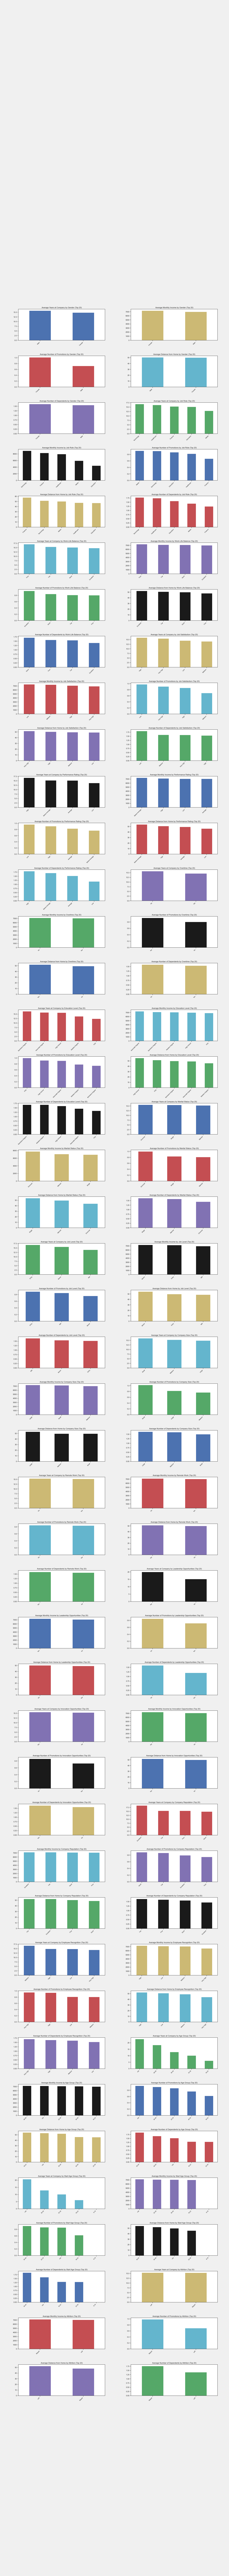

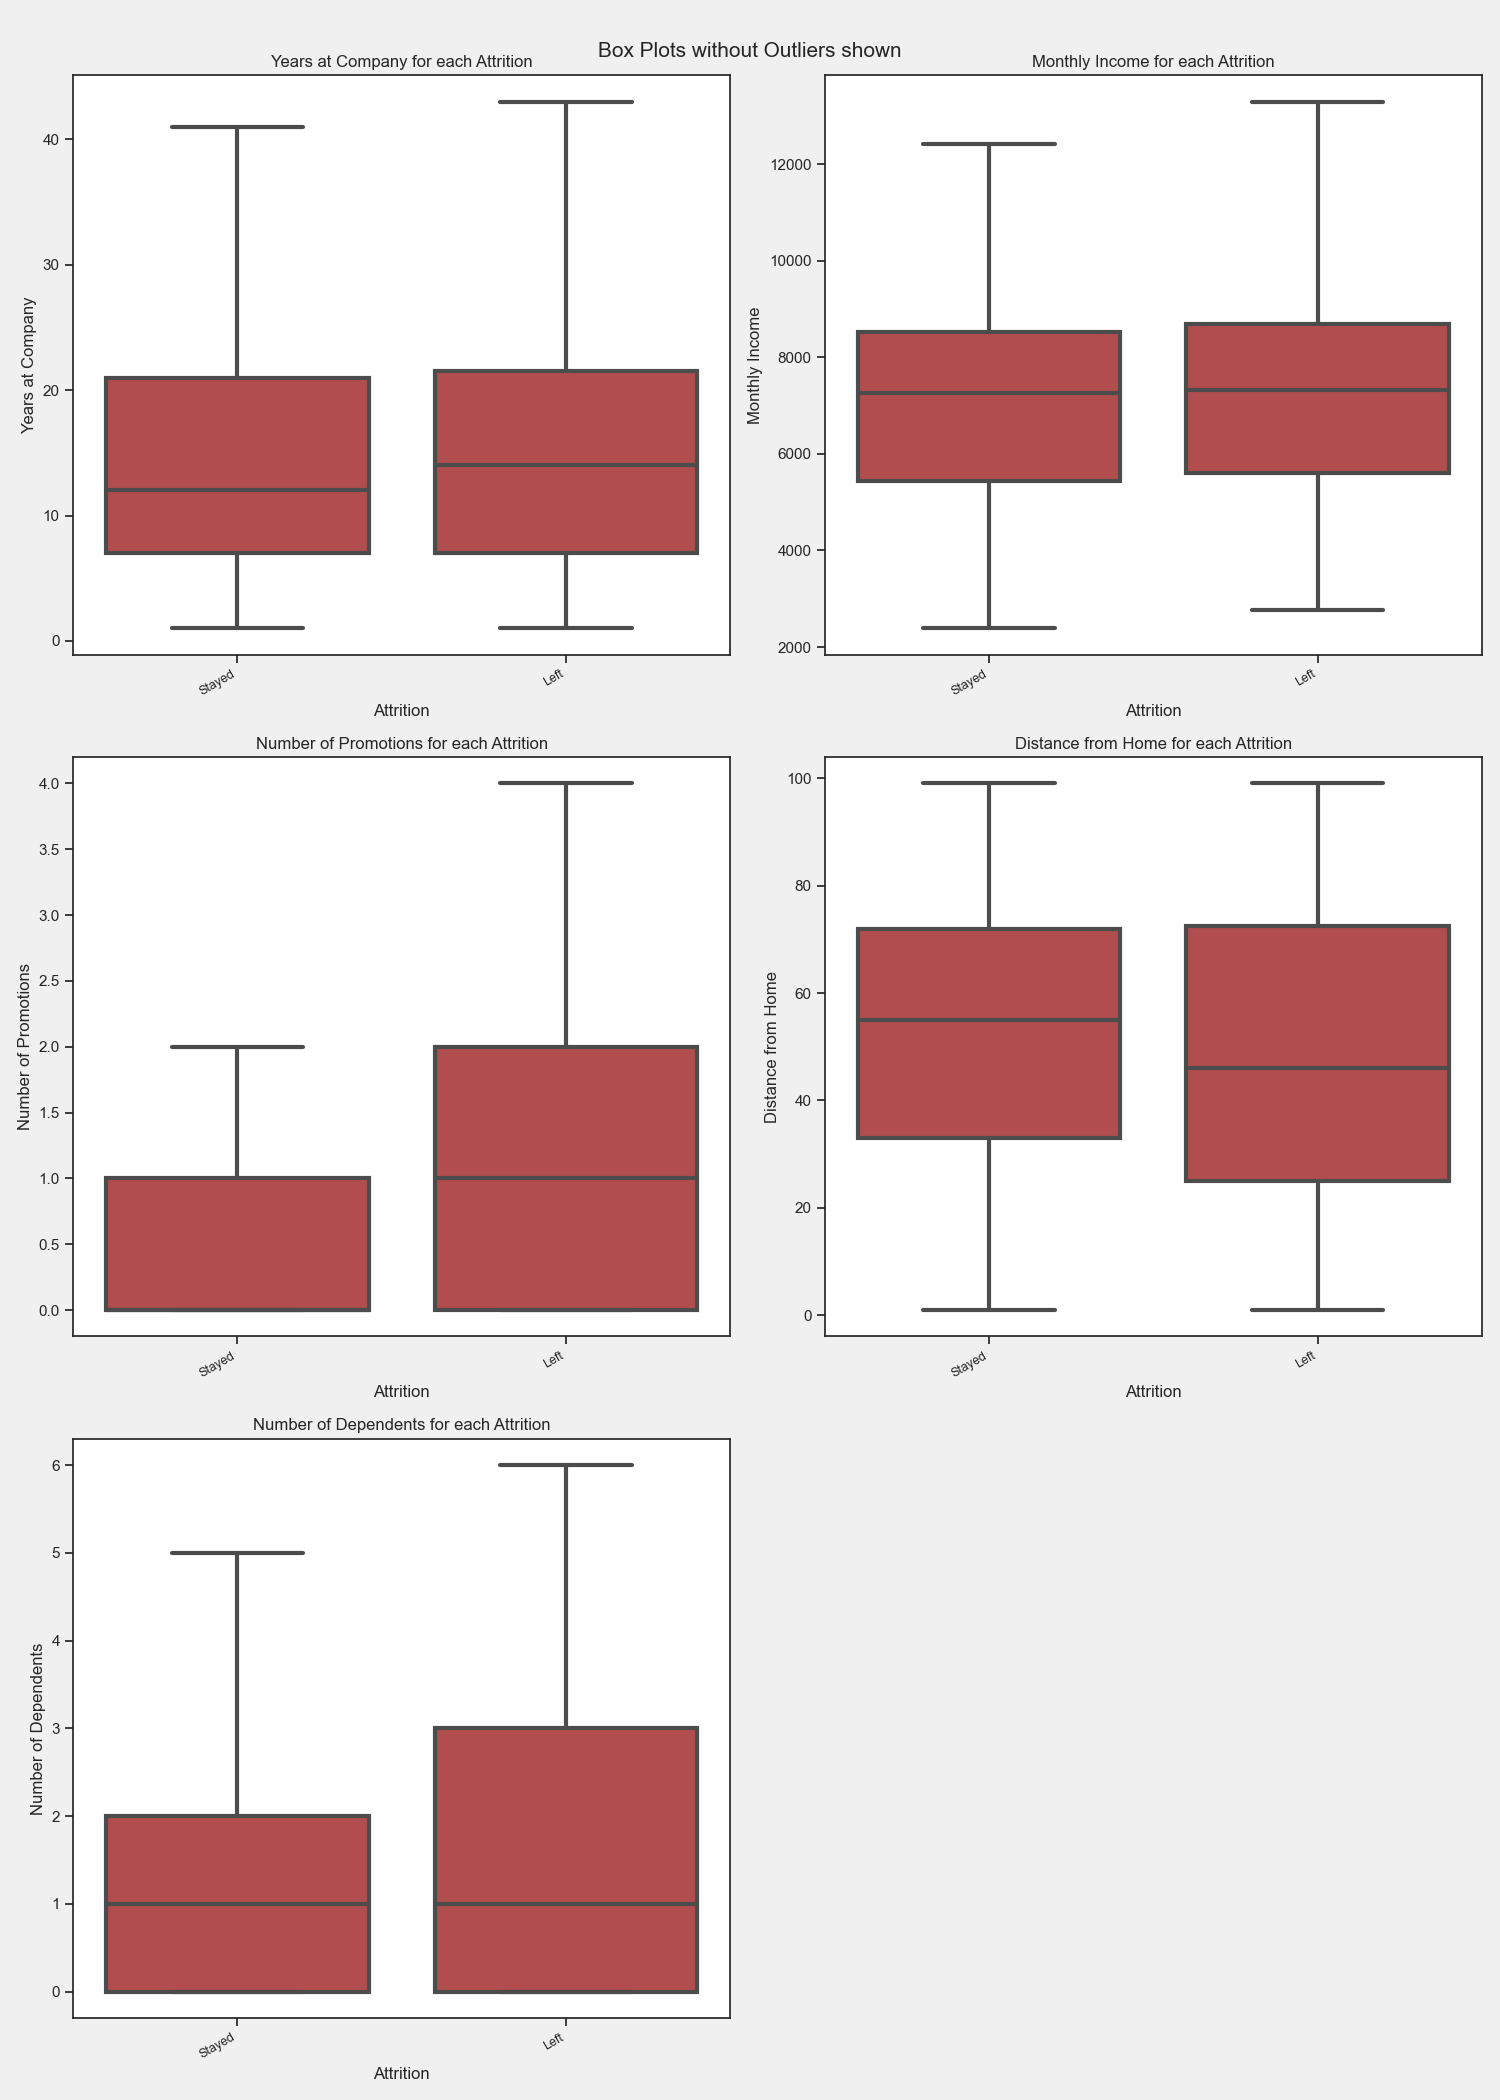

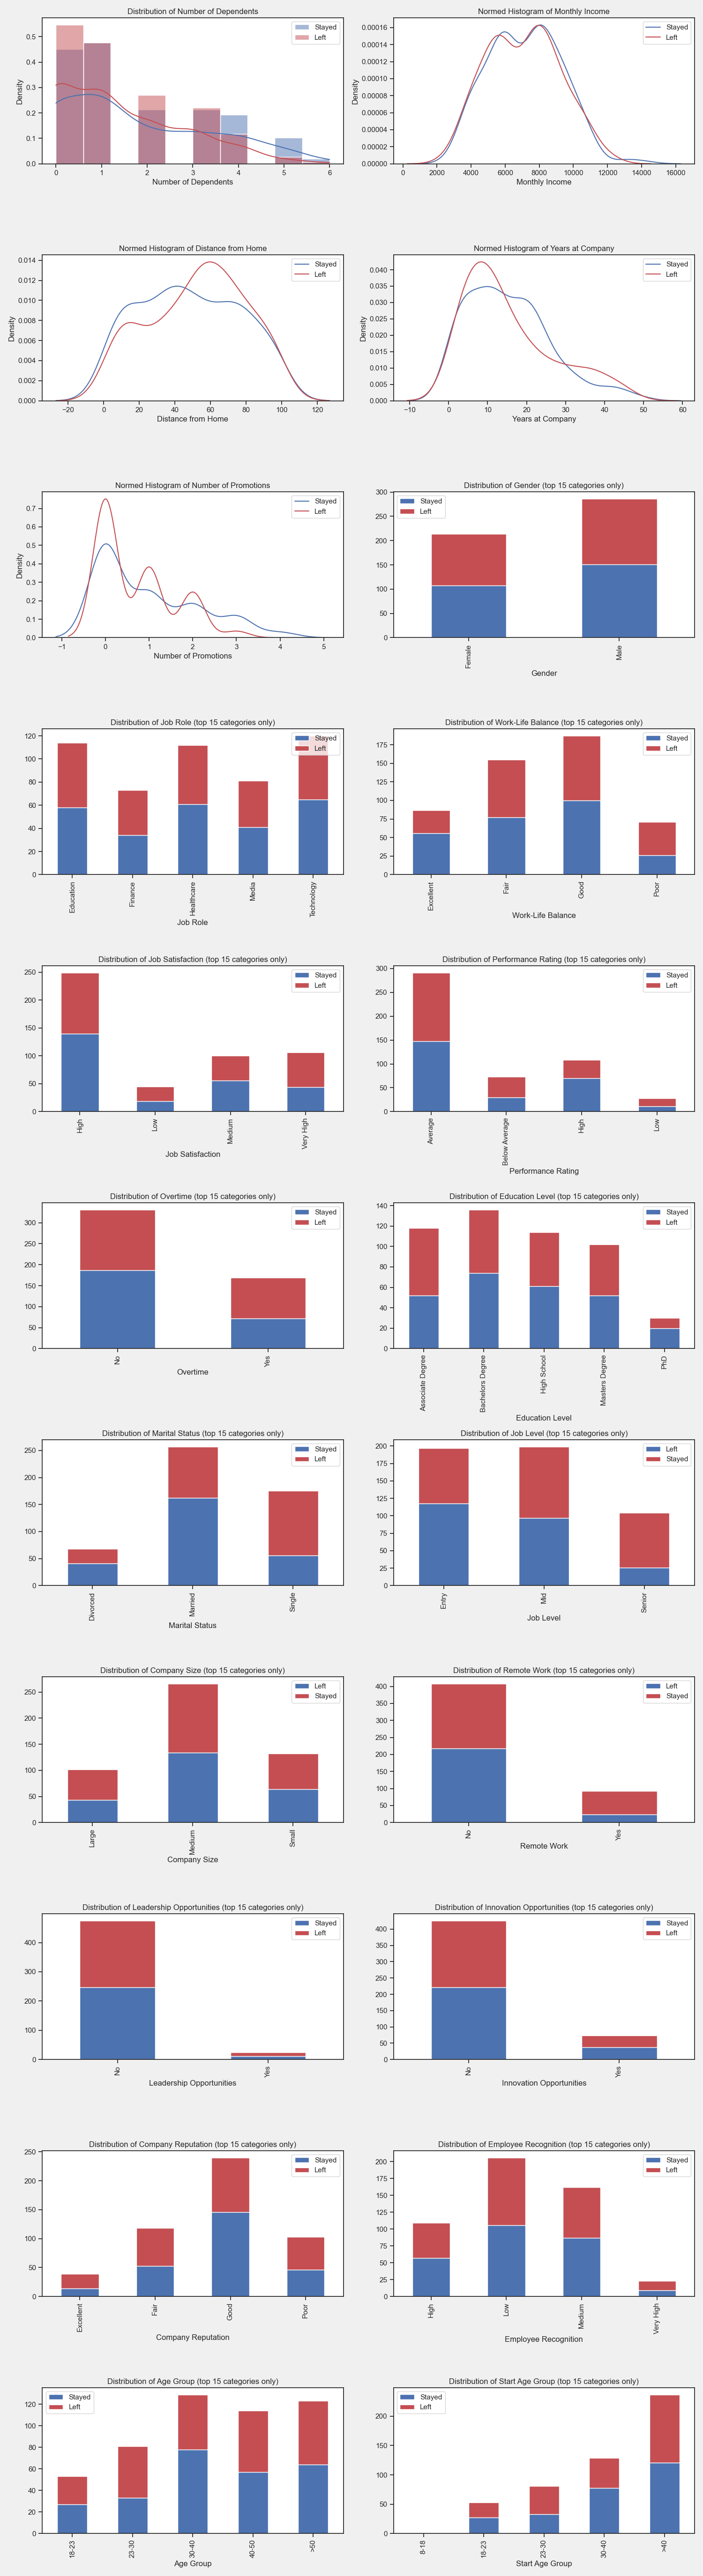

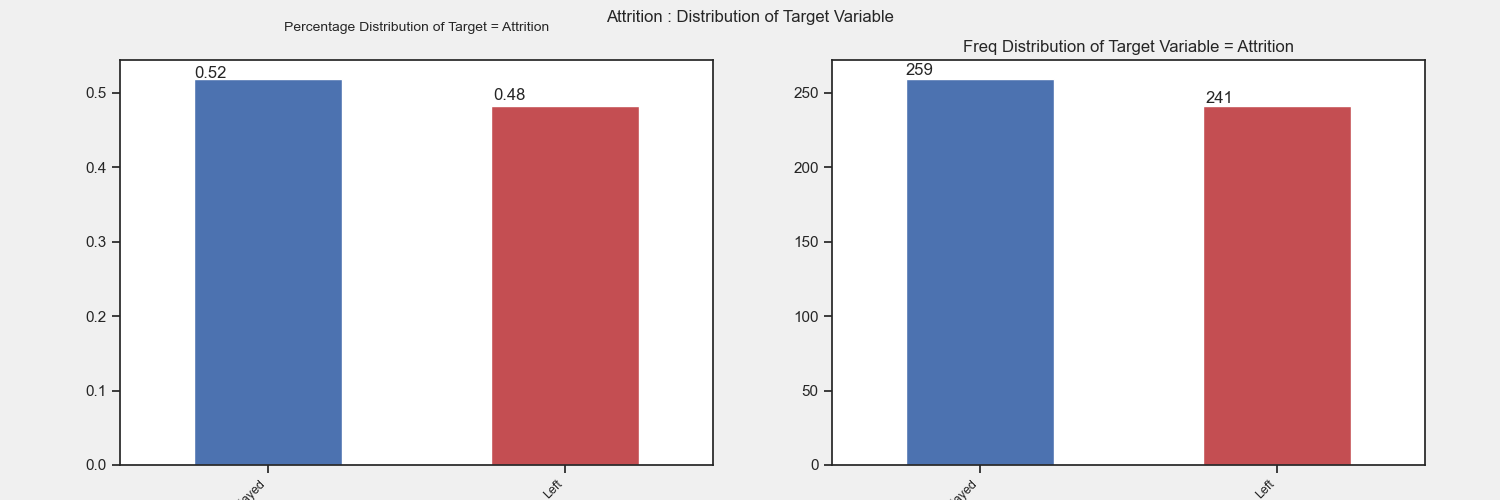

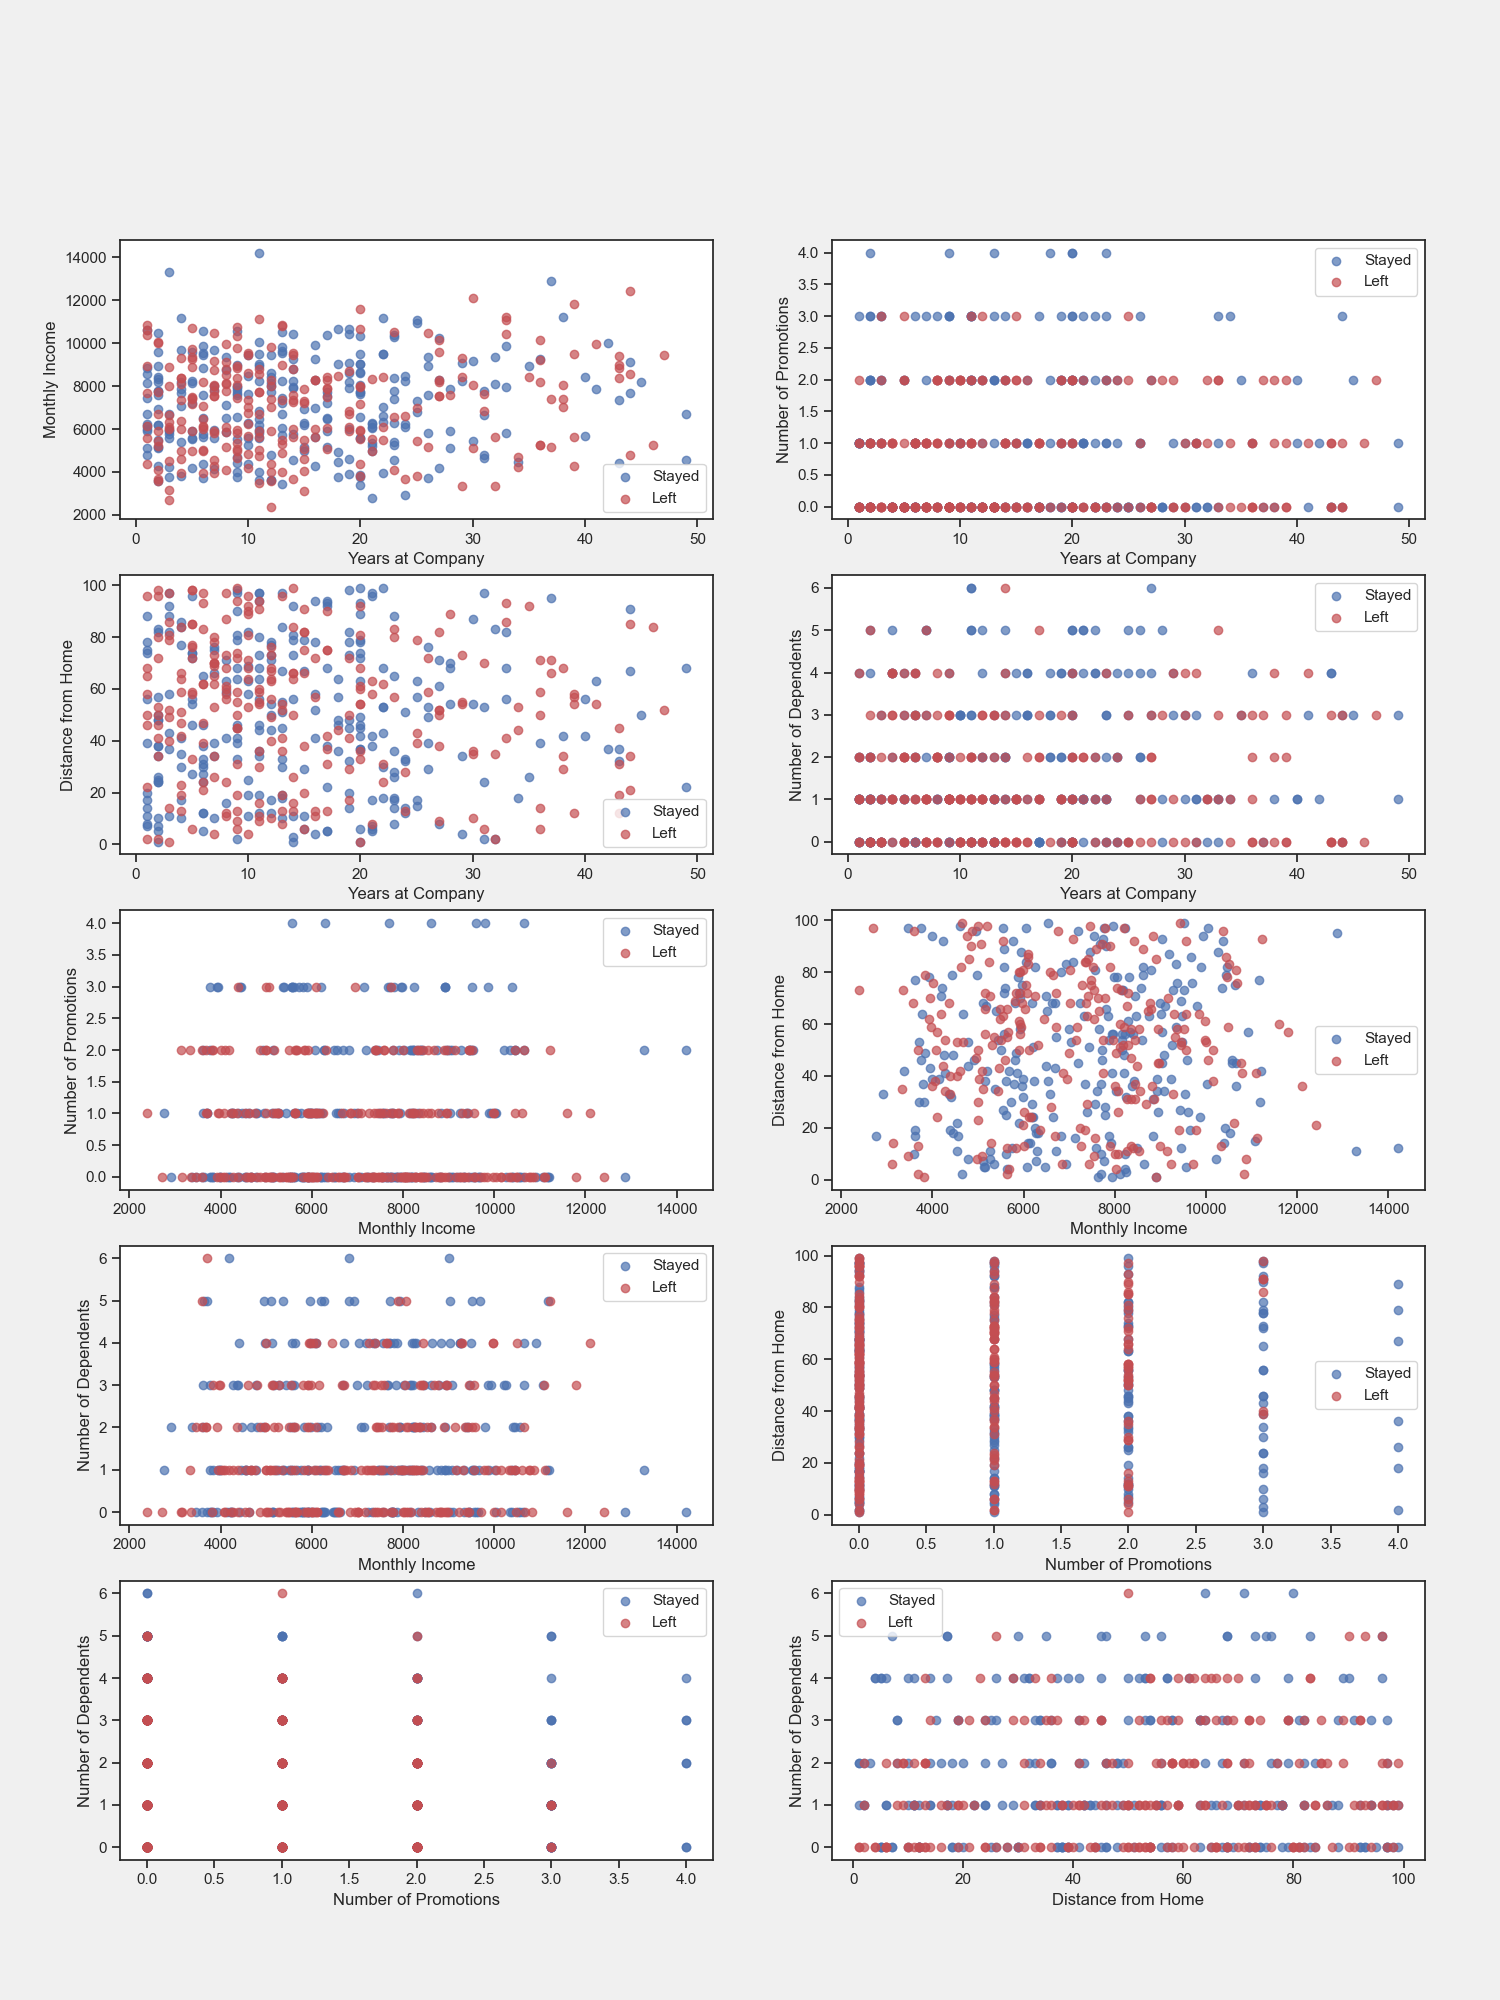

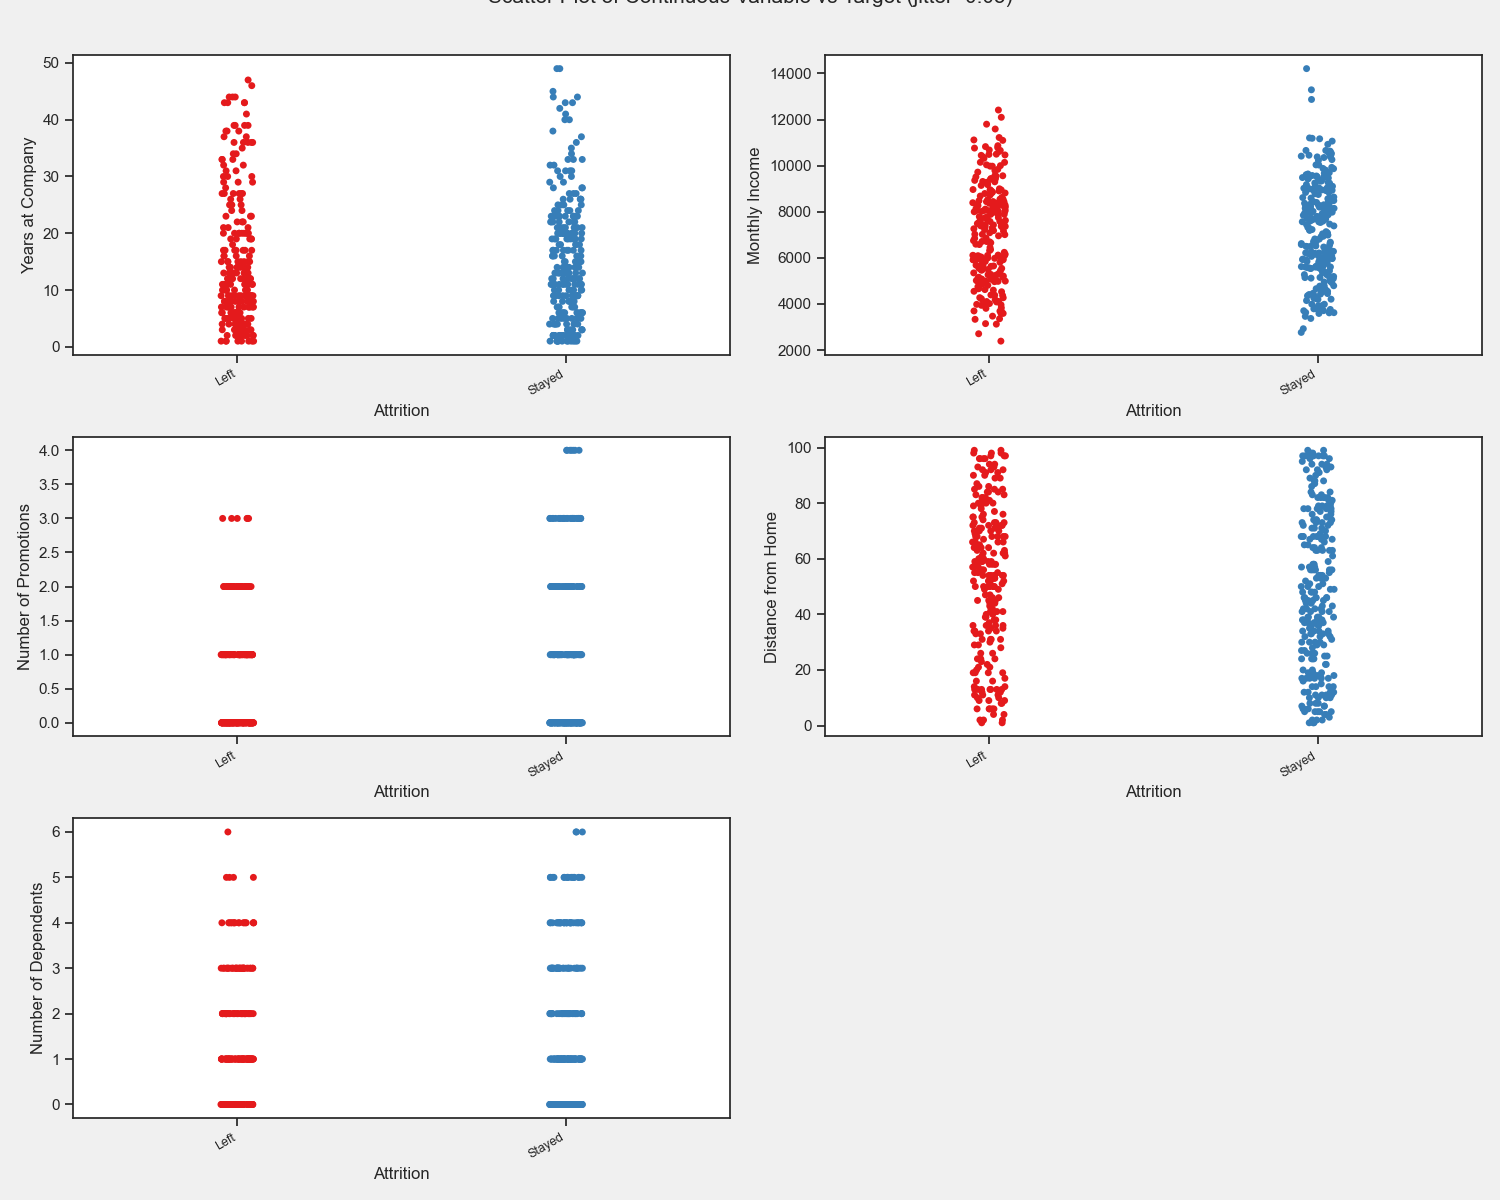

In [10]:
# Display the png images from the saved path
display_png_plots(path=saving_plots_path, target_feature="Attrition")

In [24]:
processed_df.describe()

Years at Company  Monthly Income  Number of Promotions  \
count    74498.000000     74498.000000       74498.000000       
mean        15.721603      7299.379514           0.832935       
std         11.223744      2152.508566           0.995289       
min          1.000000      1226.000000           0.000000       
25%          7.000000      5652.000000           0.000000       
50%         13.000000      7348.000000           1.000000       
75%         23.000000      8876.000000           2.000000       
max         51.000000     16149.000000           4.000000       

       Distance from Home  Number of Dependents  
count     74498.000000         74498.000000      
mean         49.991584             1.650326      
std          28.513611             1.553633      
min           1.000000             0.000000      
25%          25.000000             0.000000      
50%          50.000000             1.000000      
75%          75.000000             3.000000      
max          99.000000             6.000000

### Ratio of target feature

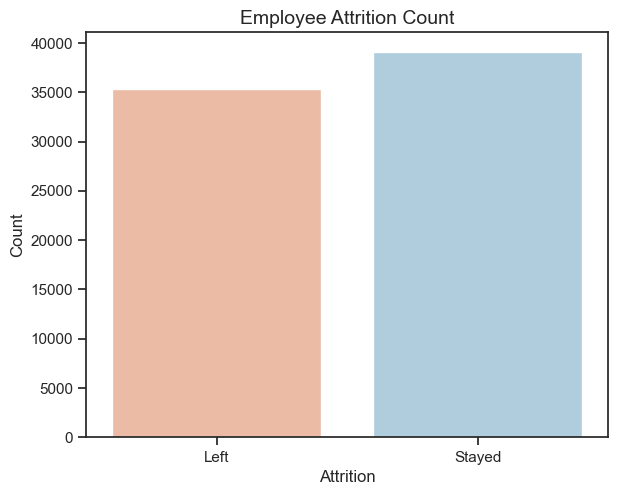

In [51]:
plt.figure(figsize=(6, 5))

# Create the count plot
sns.countplot(x=processed_df["Attrition"], palette="RdBu")

# Add title and labels
plt.title("Employee Attrition Count", fontsize=14)
plt.xlabel("Attrition", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Show the plot
plt.show()

### Count plots of the categorical features

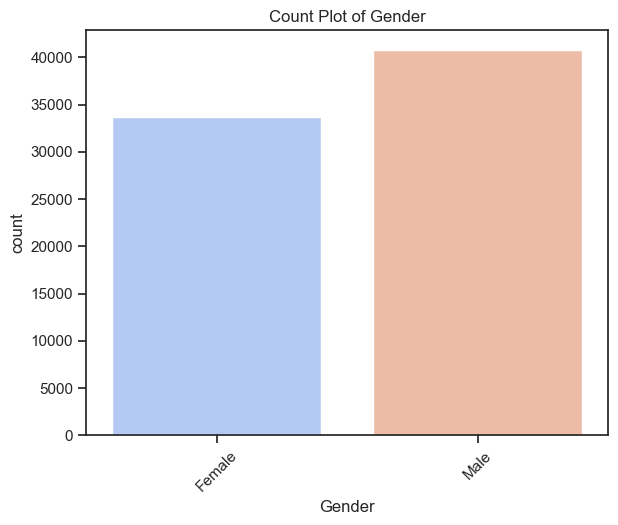

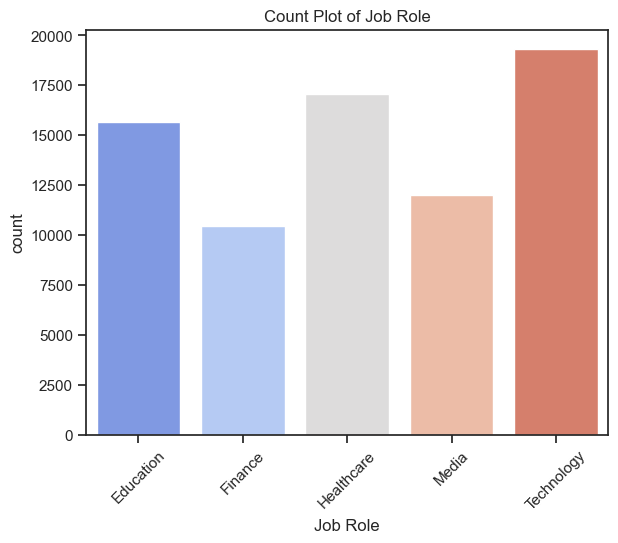

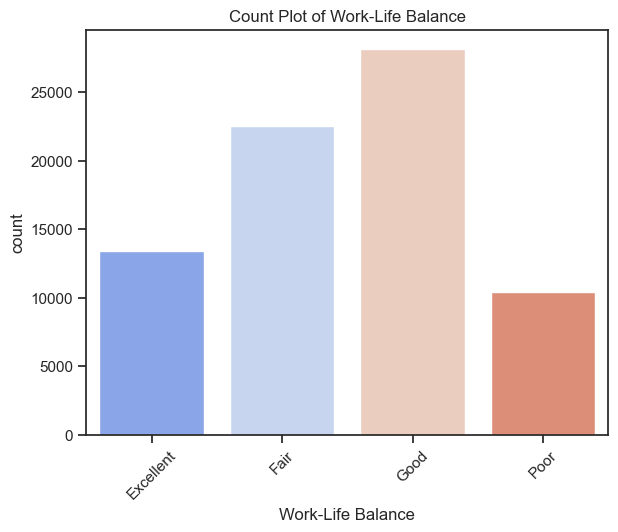

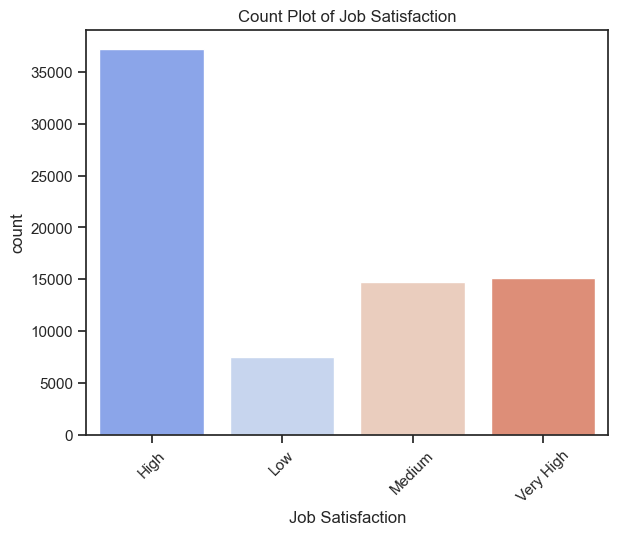

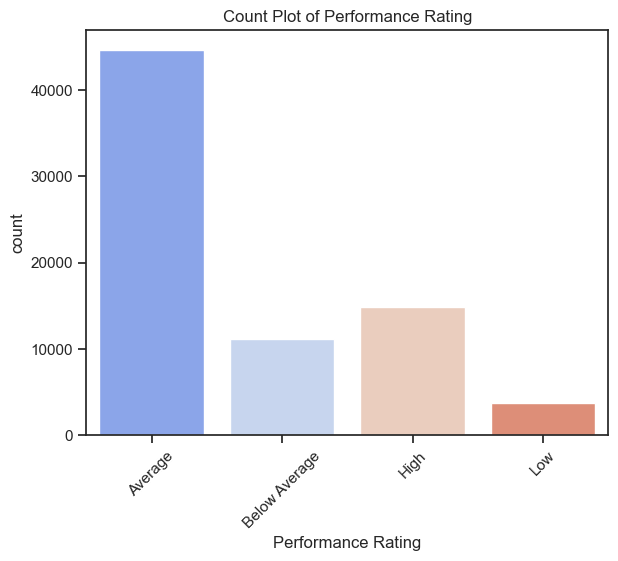

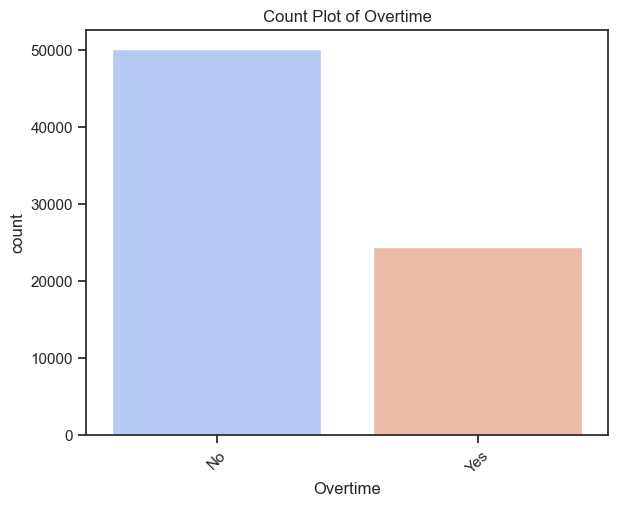

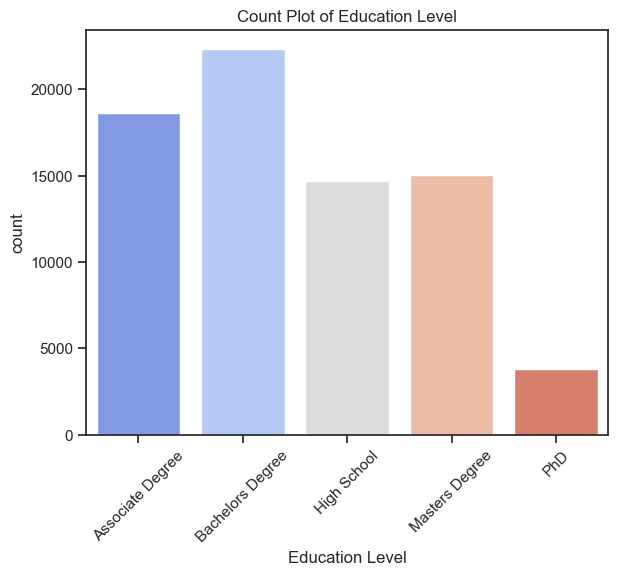

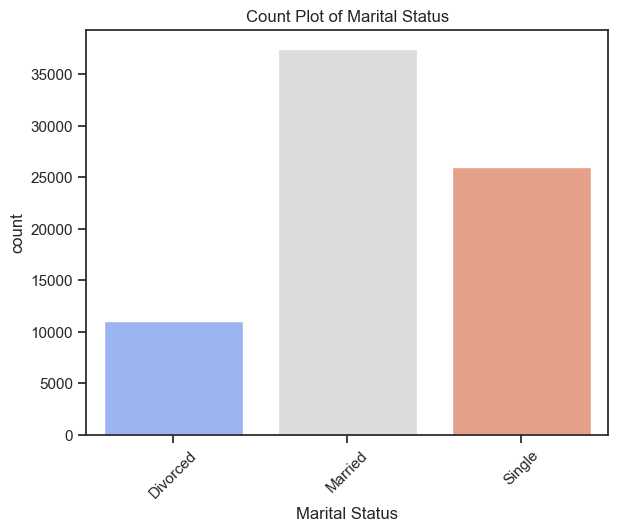

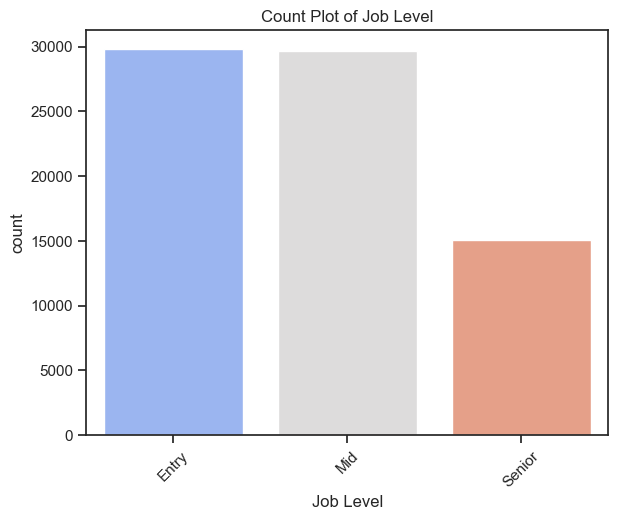

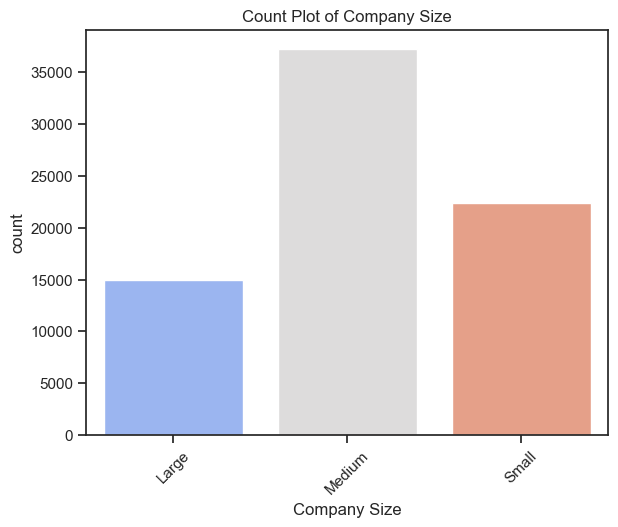

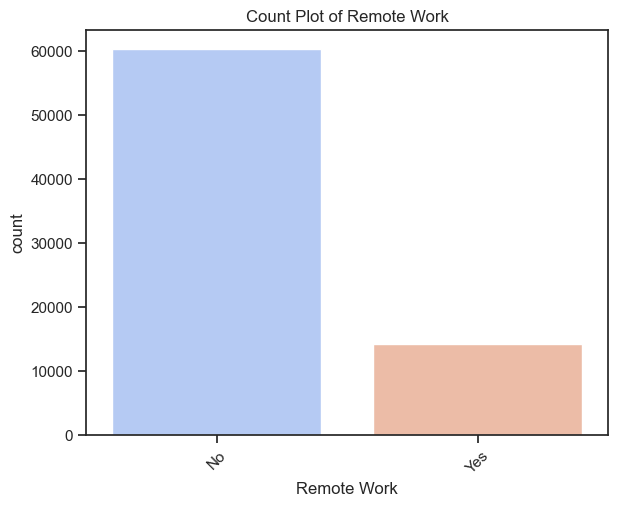

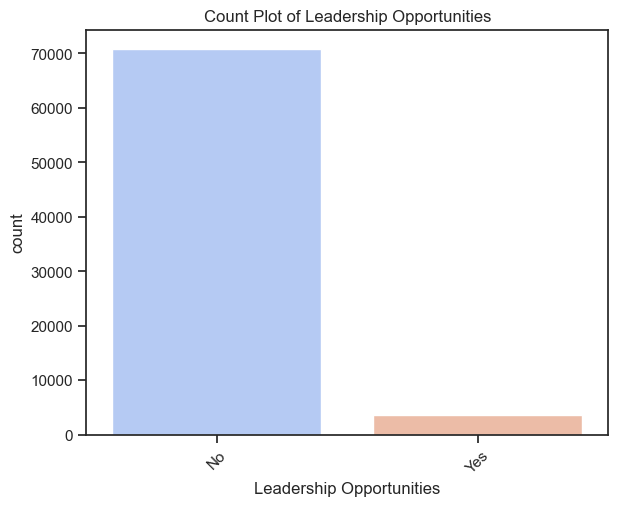

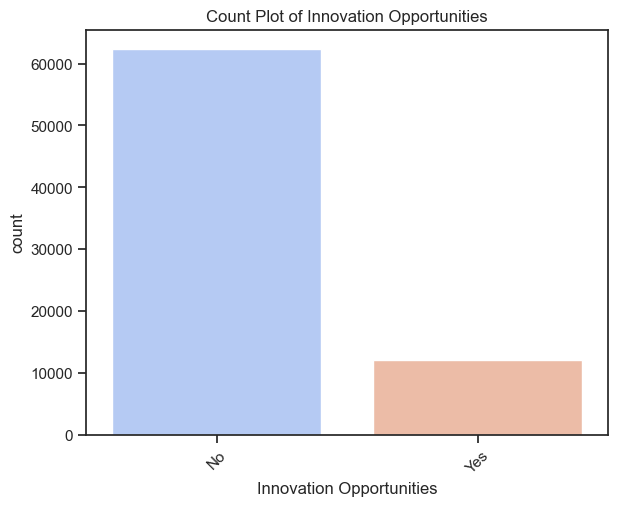

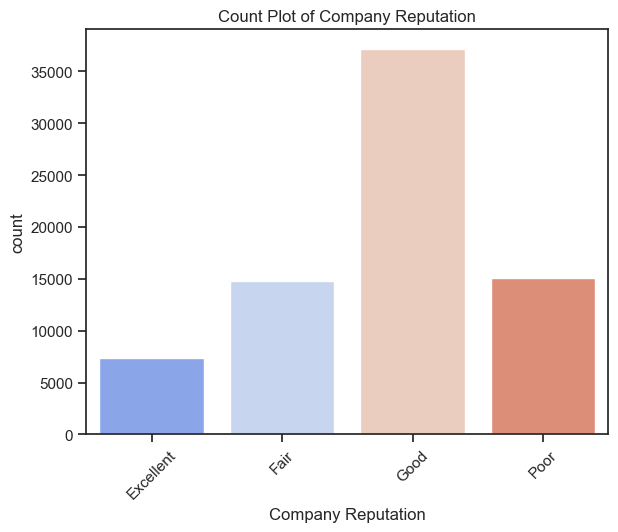

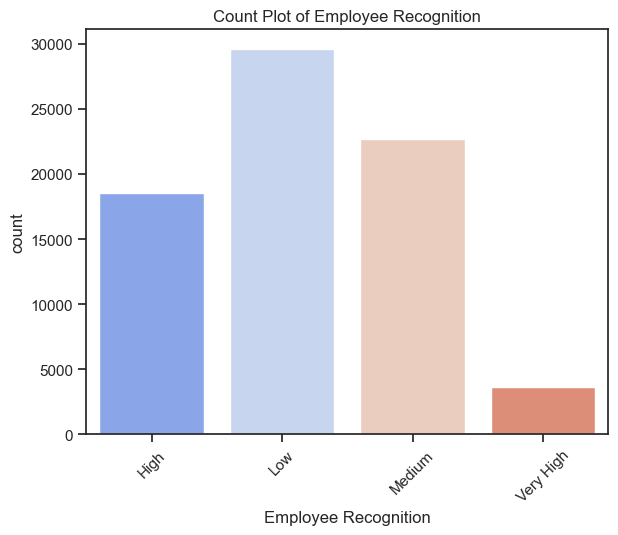

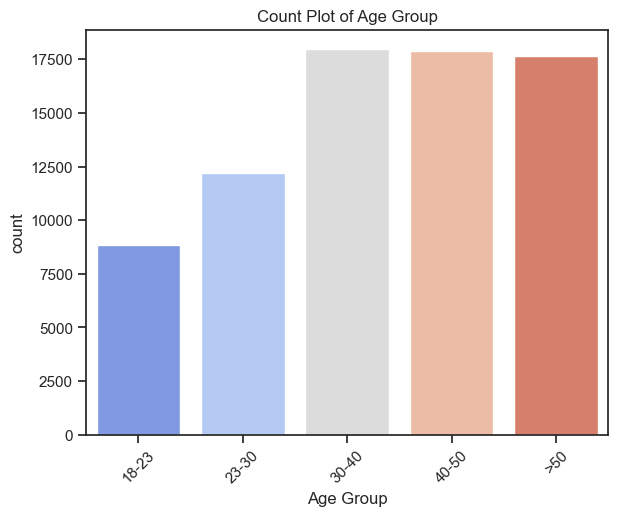

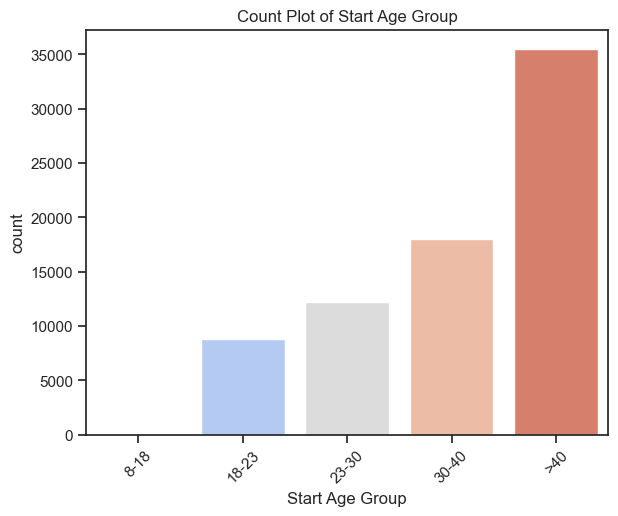

In [69]:
# List of columns to exclude
exclude_columns = ['Attrition']

# Loop through all the columns in the dataframe
for col in processed_df.select_dtypes(include=['category']).columns:
    if col not in exclude_columns:
        plt.figure(figsize=(6, 5))
        sns.countplot(x=col, data=processed_df, palette="coolwarm")  # You can change the palette here
        plt.title(f"Count Plot of {col}")
        plt.xticks(rotation=45)
        plt.show()


### Histograms plots of the continues features

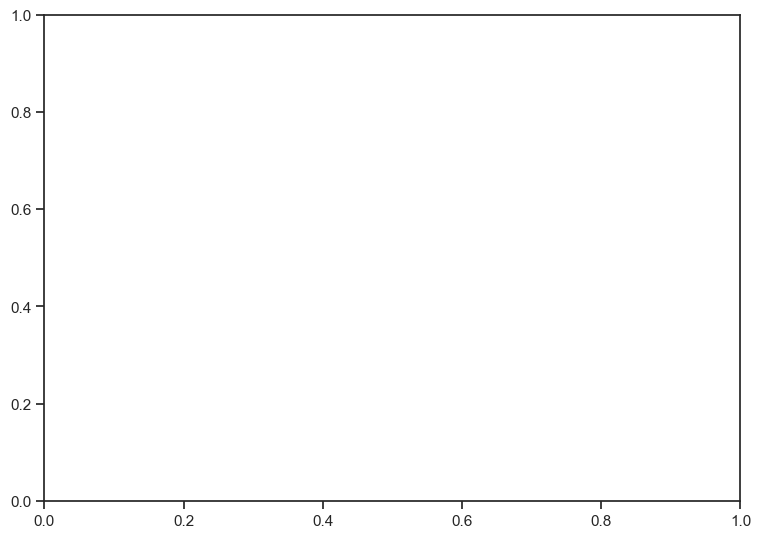

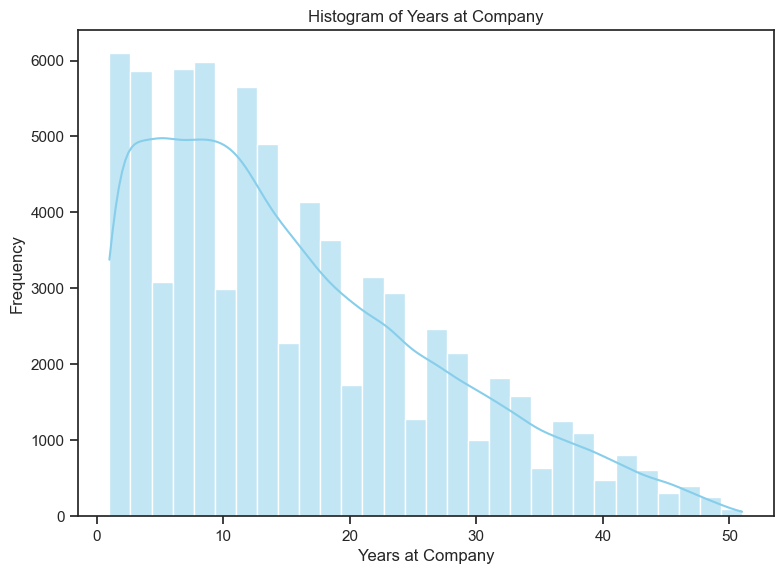

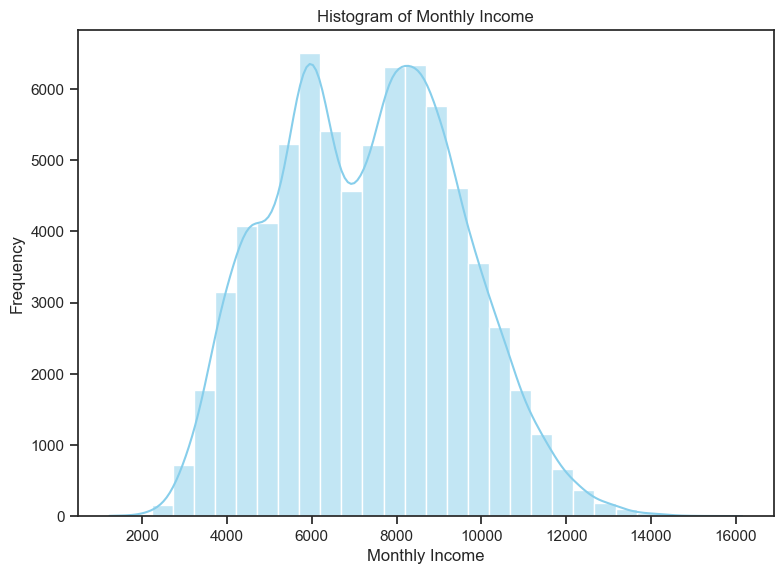

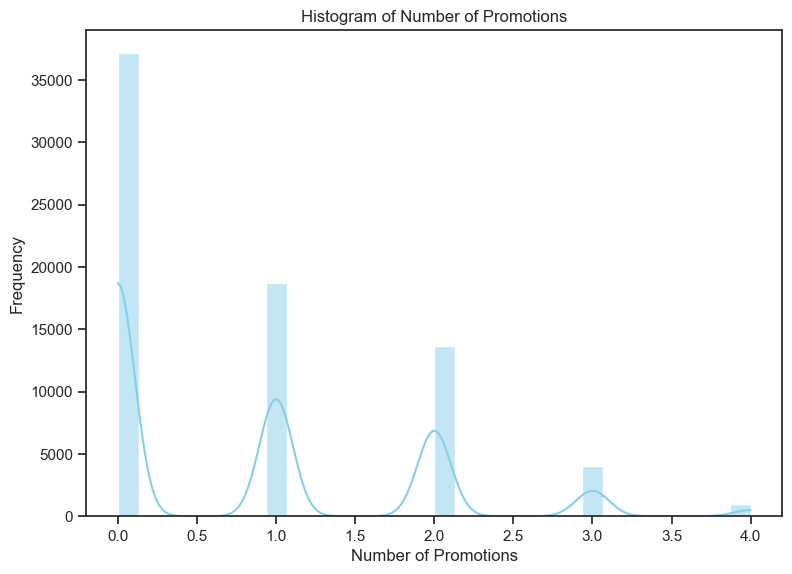

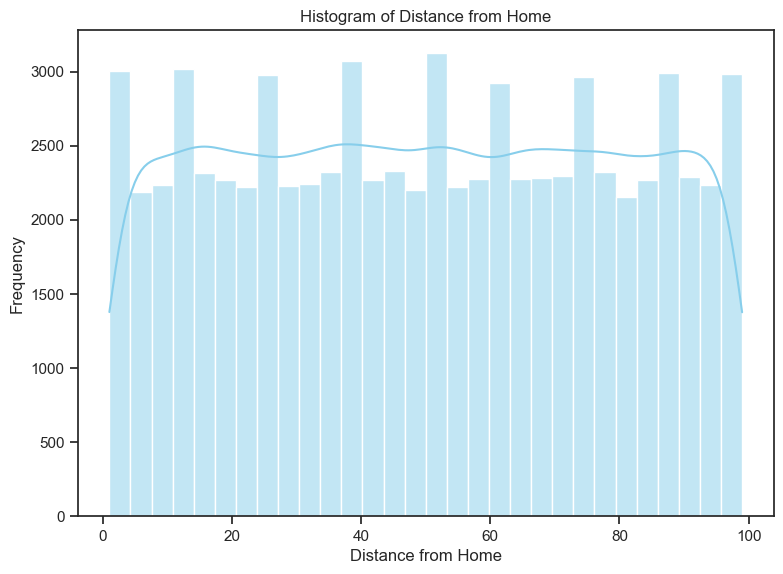

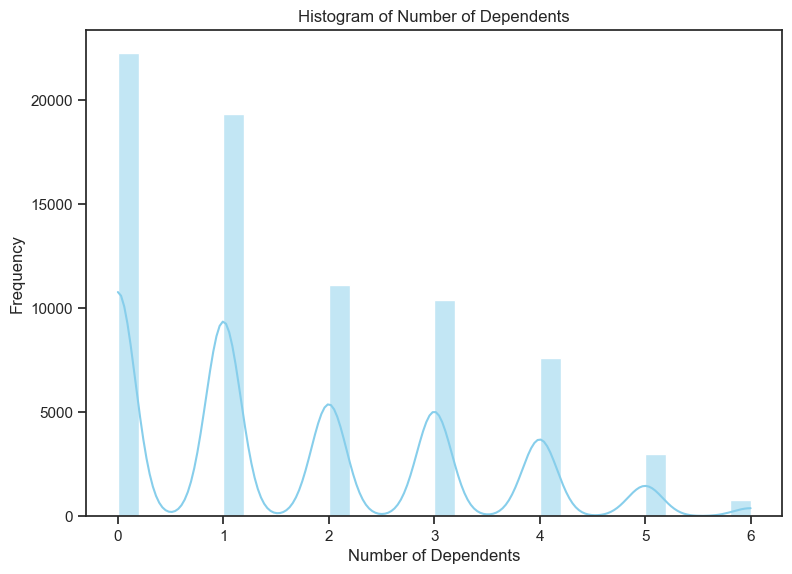

In [67]:
# Select the continuous features (numeric columns)
continuous_features = processed_df.select_dtypes(include=['int64']).columns

# Plot histograms for continuous features
for col in continuous_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(processed_df[col], kde=True, color='skyblue', bins=30)  # KDE (Kernel Density Estimation) adds a smooth curve
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


### Chack the skewnees of the continues features

In [78]:
def highlight(cell_value):
    highlight = 'background-color: mediumspringgreen;'
    default = ''
    negative = 'background-color: hotpink;'
    if cell_value > 1:
        return highlight
    elif cell_value < -1:
        return negative
    #else
       # return default 

pd.DataFrame(processed_df[continuous_features].skew(),
             columns=['skewness']).sort_values(by='skewness',
               ascending=False).style.applymap(highlight)

As we can see all the continuous features are considered normally distributed